In [20]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [2]:
2+2

4

In [4]:
9*9     

81

In [3]:
df = pd.read_csv("datos_google_ads.csv")

In [4]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [5]:
df.shape


(403, 26)

In [6]:
df.describe

<bound method NDFrame.describe of                                     Keyword Currency  Avg. monthly searches  \
0                     servicios financieros      ARS                  880.0   
1                          sector economico      ARS                 2400.0   
2                       sectores economicos      ARS                 2400.0   
3                        sector cuaternario      ARS                  880.0   
4    sector primario secundario y terciario      ARS                 1000.0   
..                                      ...      ...                    ...   
398          consultoria sector cuaternario      ARS                   10.0   
399                    la economia primaria      ARS                   10.0   
400               sector economico de claro      ARS                   10.0   
401            sector agropecuario economia      ARS                   10.0   
402          sectores de la economia social      ARS                   10.0   

    Three month c

In [8]:
df['Currency'].duplicated().sum()

np.int64(402)

In [12]:
df=df.dropna(subset=['Top of page bid (low range)'])

In [13]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
5,sectores de la economia,ARS,1000.0,-19%,-19%,Low,1.0,9.74,76.88,NaN,...,1000.0,880.0,1600.0,880.0,110.0,590.0,1600.0,1600.0,1600.0,1300.0
7,auditoria financiera,ARS,70.0,-22%,0%,Medium,37.0,34.67,132.17,NaN,...,70.0,70.0,70.0,40.0,40.0,40.0,90.0,90.0,90.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,gestión de activos financieros,ARS,10.0,0%,∞,Medium,60.0,54.64,1117.04,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
341,grupo financiero unión,ARS,20.0,0%,-50%,Medium,44.0,13.39,22.82,NaN,...,10.0,30.0,30.0,20.0,30.0,40.0,10.0,10.0,10.0,10.0
372,descuentos comerciales y financieros,ARS,10.0,-50%,-50%,Low,23.0,118.33,891.58,NaN,...,20.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0
378,financiera credi ya,ARS,10.0,∞,∞,Medium,49.0,22.73,133.69,NaN,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


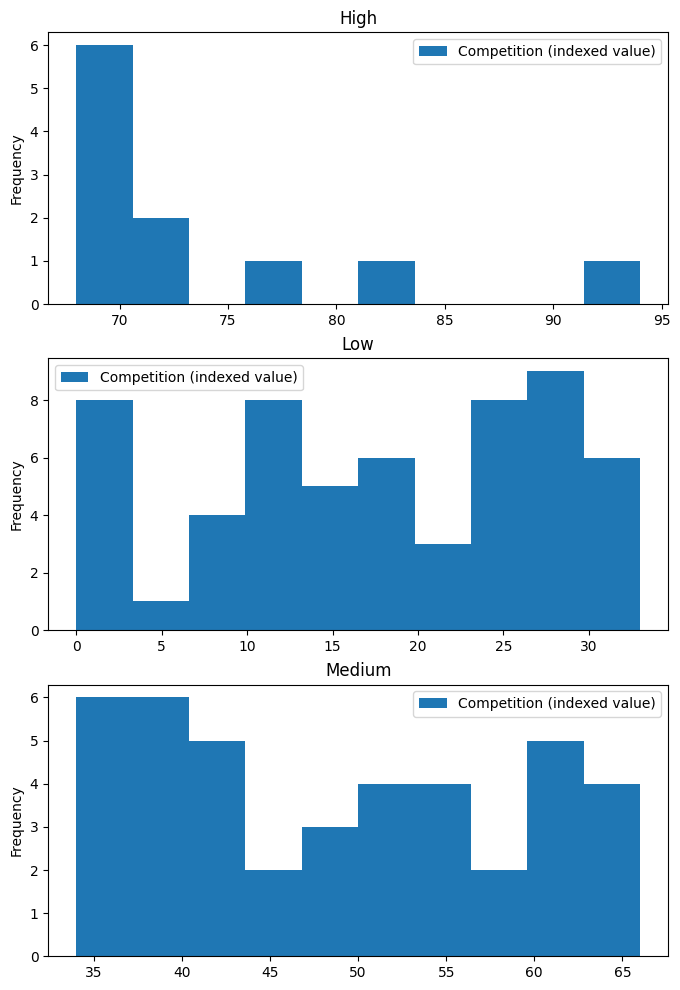

In [17]:
ax=df.plot.hist(column=["Competition (indexed value)"], by='Competition', bins=10, figsize=(8,12))

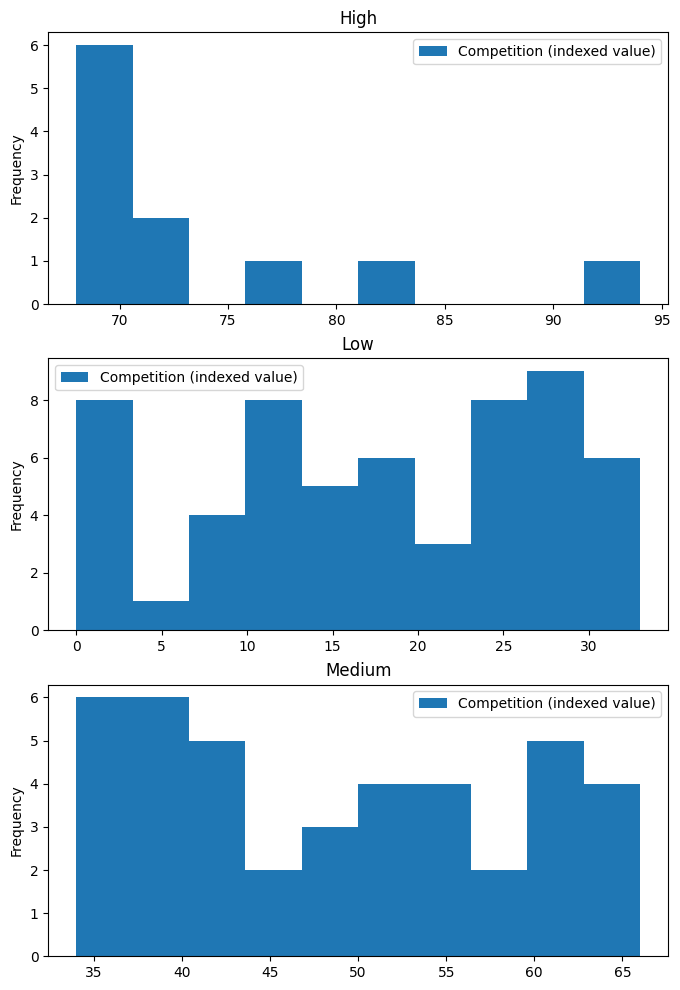

In [18]:
ax = df.plot.hist(column=["Competition (indexed value)"],by='Competition',bins=10,figsize=(8,12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

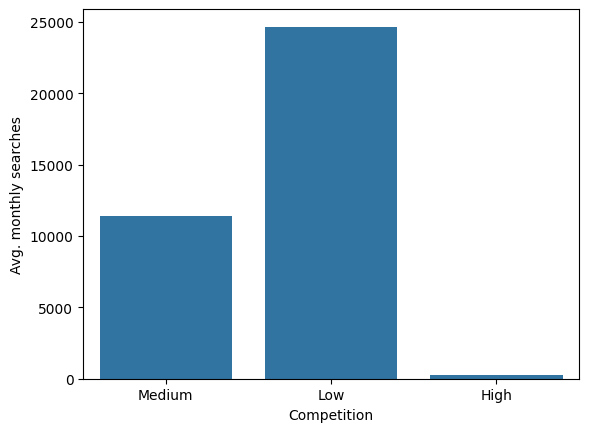

In [19]:
sns.barplot(data=df, x="Competition", y="Avg. monthly searches",errorbar=None,estimator=sum)

In [21]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
5,sectores de la economia,ARS,1000.0,-19%,-19%,Low,1.0,9.74,76.88,NaN,...,1000.0,880.0,1600.0,880.0,110.0,590.0,1600.0,1600.0,1600.0,1300.0
7,auditoria financiera,ARS,70.0,-22%,0%,Medium,37.0,34.67,132.17,NaN,...,70.0,70.0,70.0,40.0,40.0,40.0,90.0,90.0,90.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,gestión de activos financieros,ARS,10.0,0%,∞,Medium,60.0,54.64,1117.04,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
341,grupo financiero unión,ARS,20.0,0%,-50%,Medium,44.0,13.39,22.82,NaN,...,10.0,30.0,30.0,20.0,30.0,40.0,10.0,10.0,10.0,10.0
372,descuentos comerciales y financieros,ARS,10.0,-50%,-50%,Low,23.0,118.33,891.58,NaN,...,20.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0
378,financiera credi ya,ARS,10.0,∞,∞,Medium,49.0,22.73,133.69,NaN,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [22]:
df = df.rename(columns={"Avg. monthly searches": "avg_searches", "Competition (indexed value)": "competition_index"})

In [ ]:
q = """ 
SELECT 
Keyword,
avg_searches,
Competition,cd
competition_index
FROM df
WHERE avg_searches >= 500
"""

df_export = pysqldf(q)

In [24]:
df_export

,Keyword,avg_searches,Competition,competition_index
0,servicios financieros,880.0,Medium,36.0
1,sector economico,2400.0,Low,0.0
2,sectores economicos,2400.0,Low,0.0
3,sectores de la economia,1000.0,Low,1.0
4,entidades financieras,720.0,Low,25.0
5,economia informal,720.0,Low,1.0
6,financieros,4400.0,Medium,37.0
7,banco de servicios financieros,2900.0,Low,26.0
8,asesoria financiera,1900.0,Medium,61.0
9,servicio financiero carrefour,5400.0,Low,32.0


In [25]:
df_export.to_csv("datos_google_ads_procesados.csv")

In [26]:
4+4

8